# Practice Numba cuda 1<br>

## Let's start with some python coding exercises. Be sure to in include docstrings when you define your functions!

1) Write a python function `dn_sin0(n)` to evaluate the $n^{th}$ derivate of $sin(0)$. This should provide a chance to use the `if-elif-else` control structure.

2) Write python code to compute the values of the function `taylor_sin(x,n)` that evaluates the Taylor series for $sin(x)$ with truncation error of order $h^n$; i.e. including $n$ terms of degree $0$ through $n-1$.

3) Make a plot showing the function $sin(x)$ and it's Taylor series expansions neglecting terms of order `n in range(2,16,2)`. Make sure your plot includes a legend that identifies the untruncated curve $sin(x)$ and and the truncation order for the other curves in the plot. (This will be the first of your exercises in searching for and interpreting documentation.)

4) Consider computing how well a truncated Taylor series approximates the function $sin(x)$ on a particular interval, One approach would be to compute an array of values of $sin(x)$ and an array of values for the truncated approximation at the same set of points. Then the problem becomes quantifying the difference between two arrays of the same shape. Note that, just like complex numbers (which can be considered as arrays of length 2), there is no natural ordering of arrays. So we need to get from the 2 arrays to a scalar value quantifying their difference.

    a) Write a function that quanitifies the difference between 2 arrays of the same shape. There are multiple ways to do this, so search for information on functions like `abs`, `max`, `norm`, and `allclose`.

    b) Use your function from 4a to determine the truncation order needed for your difference measure to be less than `1e-2` if you evaluate your functions at 50 points equally spaced across the interval $[0, \pi/4]$.

5) The "python_logistic_map" notebook looked at the case of a 1D iterated mapping. Now consider a classic iterated mapping in 2D. In complex form, the mapping is $f(z) = z^2 + c$ and the question of interest is the following: If you start at $z=0$, which values of $c$ cause the iterates to leave the vicinity of (i.e., get more than 2.5 units away from) the origin?

For this problem you should write python code to implement the real variable version of this problem. 

- Rewrite the map as a function of two real variables and write a python function that implements the map.

- Write a python function that computes the $n^{th}$ iterate starting from ${x,y}={0,0}$ with specified real and imaginary parts of the parameter $c_x \text{ and } c_y$.

- Compute a 2D boolean array specifying which constants caused the iteration to leave the vicinity of the origin within 256 iterations.

- Find an example of how to time python code execution. Include timing code, and print the time required to compute a 512 x 512 iteration count array.

- Create an image to display your results. (This should match up with the image included in the "python_logistic_map" notebook.)

- Modify your code to create an image that color codes the iteration number at which the point leaves the vicinity of the origin.

Problem 1
1.0
Problem 2/3


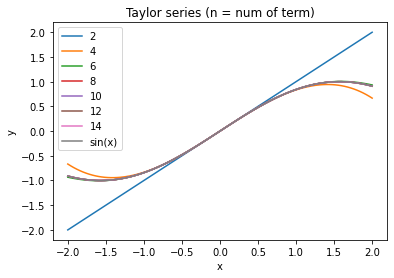

Problem 4
current difference =  0.0002410638044642588
truncation order =  6
Problem 5
Time took for calcualting mandelbrot (second) =  22.032081842422485
1(yellow) part is where it can escape.
0(purbpe) part where it cannot escape


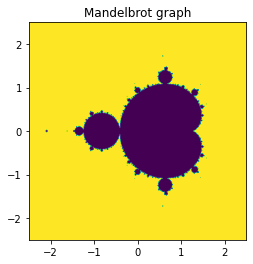

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

def dn_sin(n):
	'''
	Compute the n^th derivative of sin(x) at x=0

	input:
		n - int: the order of the derivative to compute
	output:
		float nth derivative of sin(0)
	purpose:
		problem 1) Write a python function dn_sin0(n) to evaluate the  nth  derivate of  sin(0). 
		This should provide a chance to use the if-elif-else control structure.
	'''

	x = 0
	if n%4 == 1: return np.cos(x)
	elif n%4 == 2: return -np.sin(x)
	elif n%4 == 3: return -np.cos(x)
	else: return np.sin(x)
	# pass

def taylor_sin(x, n):
	'''
	Evaluate the Taylor series of sin(x) about x=0 neglecting terms of order x^n
	
	input:
		x - float: argument of sin
		n - int: number of terms of the taylor series to use in approximation
	output:
		float value computed using the taylor series truncated at the nth term
	'''
	y = 0
	for k in range(n):
		y += dn_sin(k) * (x**k) / math.factorial(k) 
	return y
	# pass


def measure_diff(ary1, ary2):
	'''
	Compute a scalar measure of difference between 2 arrays

	input:
		ary1 - numpy array of float values
		ary2 - numpy array of float values
	output:
		a float scalar quantifying difference between the arrays
	'''
	diff = ary1 - ary2
	return np.sum(np.absolute(diff))
	# pass


def escape(cx, cy, dist,itrs, x0=0, y0=0):
	'''
	Compute the number of iterations of the logistic map, 
	f(x+j*y)=(x+j*y)**2 + cx +j*cy with initial values x0 and y0 
	with default values of 0, to escape from a cirle centered at the origin.

	inputs:
		cx - float: the real component of the parameter value
		cy - float: the imag component of the parameter value
		dist: radius of the circle
		itrs: int max number of iterations to compute
		x0: initial value of x; default value 0
		y0: initial value of y; default value 0
	returns:
		an int scalar interation count
	'''
	x = x0
	y = y0
	r = 0
	for i in range(itrs):
		r = math.sqrt(x**2 + y**2)
		if dist > r:
			x_n = x**2 - y**2 + cx 
			y_n = 2*x*y + cy
			x = x_n
			y = y_n
		else: return i
	return 0
	# pass
	# 
    # xtemp := x×x - y×y + x0
    # y := 2×x×y + y0
    # x := xtemp
    # iteration := iteration + 1

def mandelbrot(cx,cy,dist,itrs):
	'''
	Compute escape iteration counts for an array of parameter values

	input:
		cx - array: 1d array of real part of parameter
		cy - array: 1d array of imaginary part of parameter
		dist - float: radius of circle for escape
		itrs - int: maximum number of iterations to compute
	output:
		a 2d array of iteration count for each parameter value (indexed pair of values cx, cy)
	'''
	#create a 2D numpy array (init to zero) to store n_ss values at each of the m values of r.
	# x = numpy.zeros([m,n_ss])
	f = np.zeros([len(cx), len(cy)])
	for i in range(len(cx)):
		for j in range(len(cy)):
			f[i][j] = escape(cx[i], cy[j], dist, itrs)
	return f
	# pass


if __name__ == '__main__':
	# problem 1
	print('Problem 1')
	# print(dn_sin.__doc__)
	print(dn_sin(1)) # first: 1


	#Problem 2/3
	print('Problem 2/3')	
	x = np.linspace(-2, 2, 100)
	for n in range(2,16,2): #for n in len(range(2,16,2)):
		#compute taylor series
		y = []
		for i in range(len(x)):
			x_i = x[i]
			y.append(taylor_sin(x_i, n)) #collect list of y in n's row
		#plot taylor series	
		plt.plot(x, y, label = n) # colect plot for n_th terms
	plt.plot(x, np.sin(x), label = 'sin(x)')
	plt.figure(1)
	plt.legend()
	plt.xlabel('x')
	plt.ylabel('y')
	plt.title('Taylor series (n = num of term)')	
	plt.show()
	

	#Problem 4
	print('Problem 4')	
	# diff measure to be less than 1e-2
	# use diff fn.
	# evaluate your functions at 50 points equally spaced across the interval [0,pi/4]
	x = np.linspace(0, np.pi/4, 50)
	y0 = np.sin(x)
	diff = 100
	n = 0
	while diff > 10**-2:
		n += 1	
		y = []
		for i in range(len(x)):
			x_i = x[i]
			y.append(taylor_sin(x_i, n))
		diff = measure_diff(y, y0)
	print('current difference = ', diff)
	print('truncation order = ', n)


	# problem 5
	print('Problem 5')	
	nx = 512
	ny = 512
	unit_away = 2.5
	i = 256

	x = np.linspace(-2, 1, nx)
	y = np.linspace(-1.5, 1.5, ny)
	# print time required to comput 512 x 512
	t0 = time.time()
	f = mandelbrot(x, y, unit_away, i)
	t1 = time.time() - t0
	print('Time took for calcualting mandelbrot (second) = ', t1)
	print("1(yellow) part is where it can escape.")
	print('0(purbpe) part where it cannot escape')

	for i in range(len(x)):
		for j in range(len(y)):
			if f[i][j] > 0: f[i][j] = 1

	# plot
	plt.figure(2)
	plt.imshow(f.T, extent = (-2.5, 2.5, -2.5, 2.5))
	plt.xlabel('')
	plt.ylabel('')
	plt.title('Mandelbrot graph')	
	plt.show()
	# plt.colorbar()

	# A map is a function: it takes an input value (and possibly paramter values) and returns an output value
	# rewrite the map
